In [2]:
library(tidyverse)
library(data.table)
library(EvolutionaryGames)
library(ggthemes)
library(latex2exp)
library(ggtext)

# 排名？？咋整

In [39]:
duplicate_dynamic<-function(y,M,beta,d,N,c,pow){
  
  #-----参数解释说明------#
  # #N个个体
  # N<-4
  # #M资源 c(5,15,25)
  # M<-5
  # #less effort的成本
  # c<-1
  # #投入效用
  # beta<-1
  # #more effort的成本
  # d<-4
  #-----------------------#
    
  #这里决定用N-1
  #需要取整
    # 这里有点没懂 换成N就不行了  # floor 返回小于输入值的最大整数值 Nd最大为98，Nc最大为99
  
  

  
  #群体体选择策略c或d的收益  = 概率*pai
  # 累加
  #等价Pc<(choose(N-1, Nc)*((1-y)^Nc)*(y^Nd))*pai_c
    Pc=0
    Pd=0
#     pow = -1.5
    #第n名获得资源的比重为 k*n^pow
    for (Nd in 0:(N-1)){ 
        Nc<- N-1-Nd
        pai_c = 0
        pai_d = 0
        weight_c = 0
        weight_d = 0            #若选择c、d策略，c和d分别的总权重
        for (n in 1:(Nd+1)){
            weight_d  <- weight_d + n^pow
        }
        for (n in (Nd+1):N){
            weight_c <- weight_c + n^pow
        }
        weight_all <- weight_c+weight_d-(Nd+1)^pow

        pai_c <- weight_c/weight_all*M/(Nc+1)-c
        pai_d <- weight_d/weight_all*M/(Nd+1)-d
          #策略c（cooperate, less effort）和策略d(defect，more effort)的收益
          #（1）个体选择策略c的期望收益
#         pai_c<-(c*M)/((Nc+1)*c+Nd*beta*d)-c
          #（2）个体选择策略d的期望收益
#         pai_d<-(beta*d*M)/(Nc*c+(Nd+1)*beta*d)-d
        Pc=Pc+(choose(N-1, Nd)*(y^Nd)*((1-y)^(N-Nd-1)))*pai_c
        Pd=Pd+(choose(N-1, Nd)*(y^Nd)*((1-y)^(N-Nd-1)))*pai_d
        #choose计算组合数
  }
 #choose计算组合数
  
  #（3）群体选择策略d的平均收益
  R_<-y*Pd+(1-y)*Pc
  
  #(4)复制动态方程
  #y.<-y(Pd-R_) = y(Pd-y*Pd-(1-y)*Pc) = y(1-y)(Pd-Pc)
  y.<-y*(1-y)*(Pd-Pc)
    if (is.na(y.)){
        y.<-0
    }
    return(y.)
}

In [40]:
plot_y._y<-function(M,pow){
  y.<-c()
  
  for(y in seq(0, 1, 0.01)){
    temp<-duplicate_dynamic(y,M,beta=1,d=4,N=5,c=1,pow)
    
    # N: 个体数
    # M: 资源 c(5,15,25)
    # c: less effort的成本
    # beta: 投入效用
    # d: more effort的成本
    
    y.<-c(y.,temp)
  }
  
  df <- data.frame(x = seq(0, 1, 0.01), y = y.) %>% 
    mutate(y1=c(y.[-1],1)) %>% 
    mutate(y0=y*y1)
  
  #ystar<-df$x[df$y0<0]+0.005 #即横坐标
  
  ystar<-ifelse(sum(df$x[df$y0<0])==0,0,df$x[df$y0<0]+0.005)
  
  ggplot(df,aes(x=x,y=y))+
    geom_line(color="black",size=0.3)+
    theme_few() +
    geom_point(aes(x=ystar,y=0))+
    geom_text(aes(x=ystar,y=0),label=paste("y*:",ystar),size=4,nudge_y = 0.001,nudge_x = 0.03,color="red")+
    geom_hline(aes(yintercept = 0),size=0.3)+
    labs(x = "y", y = "y.")
}

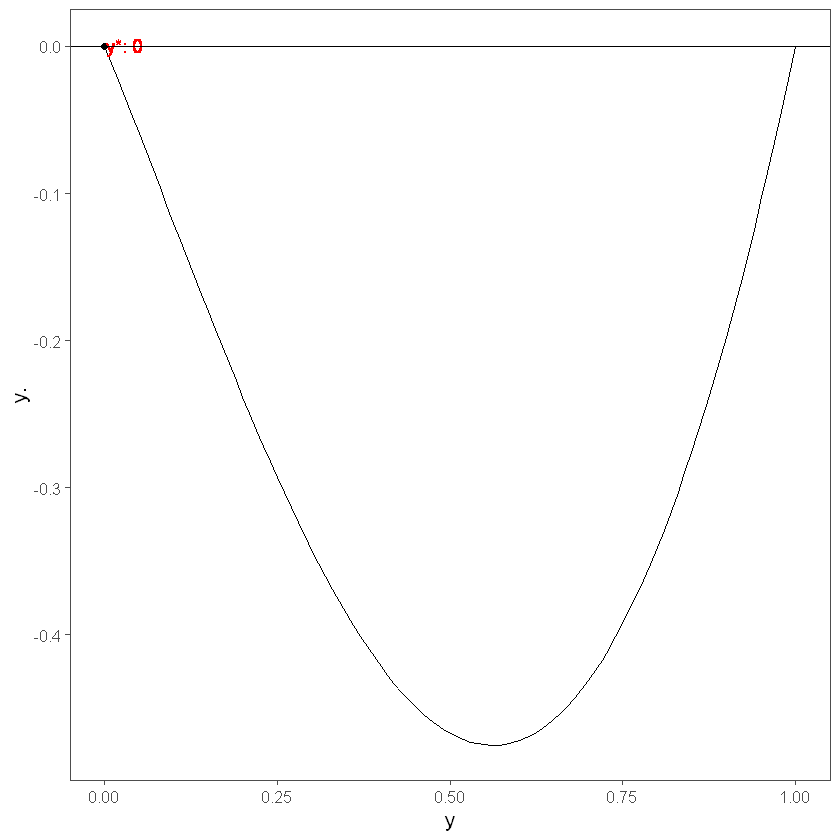

In [41]:
plot_y._y(5,-1.5)

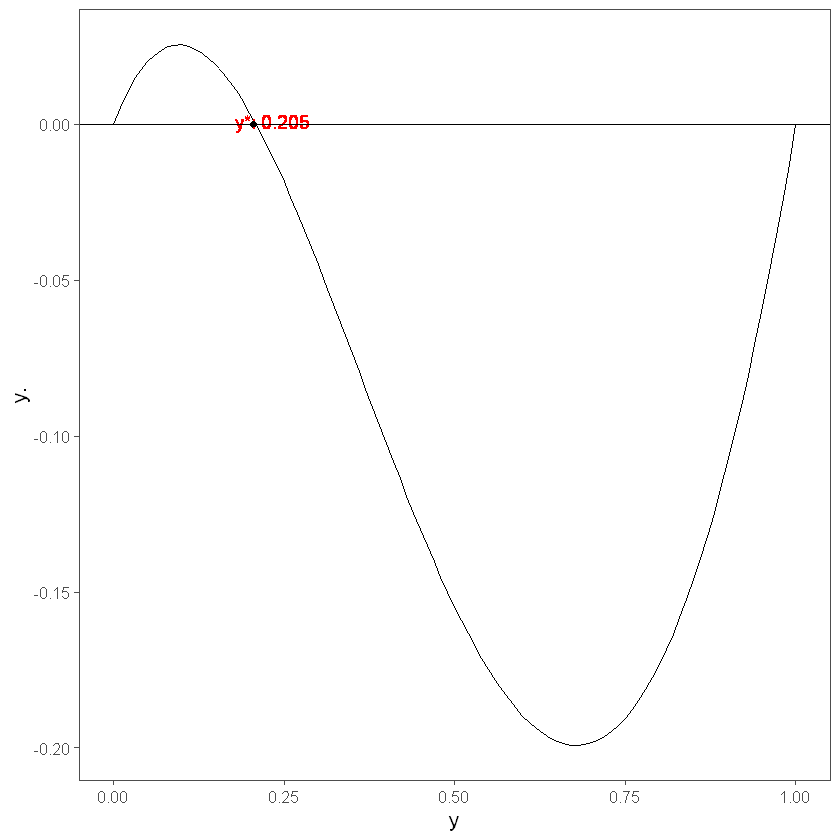

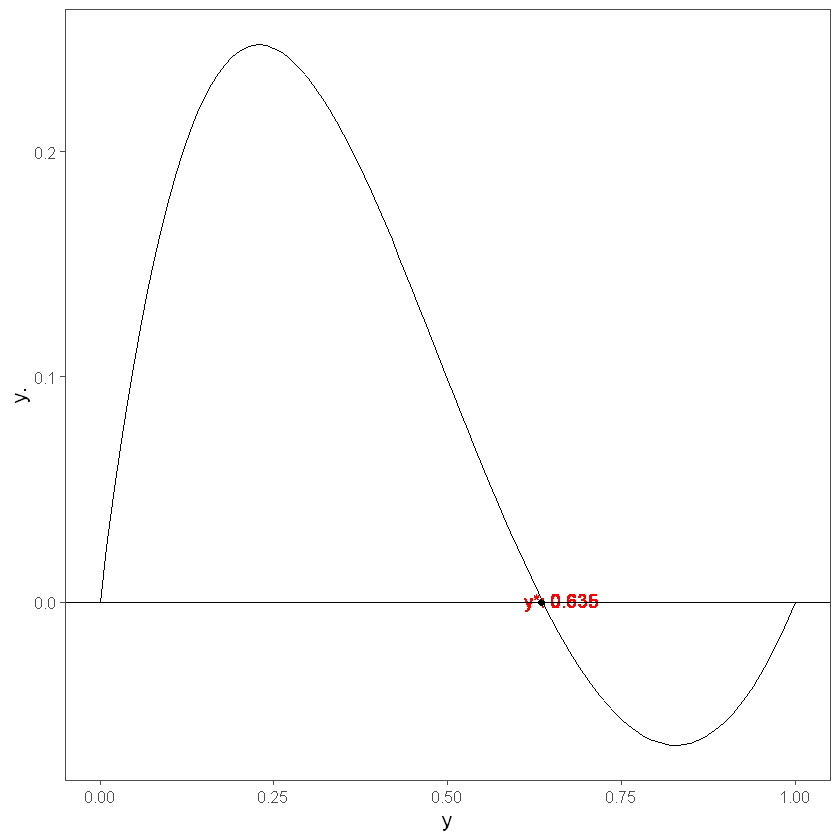

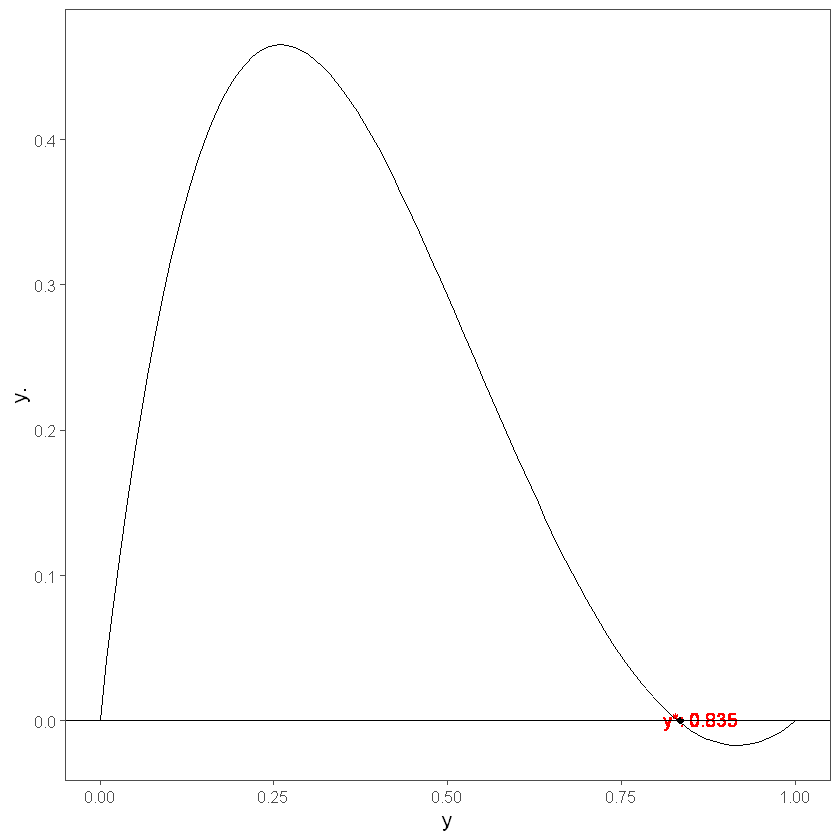

In [42]:
plot_y._y(15,-1)
plot_y._y(15,-1.5)
plot_y._y(15,-2)

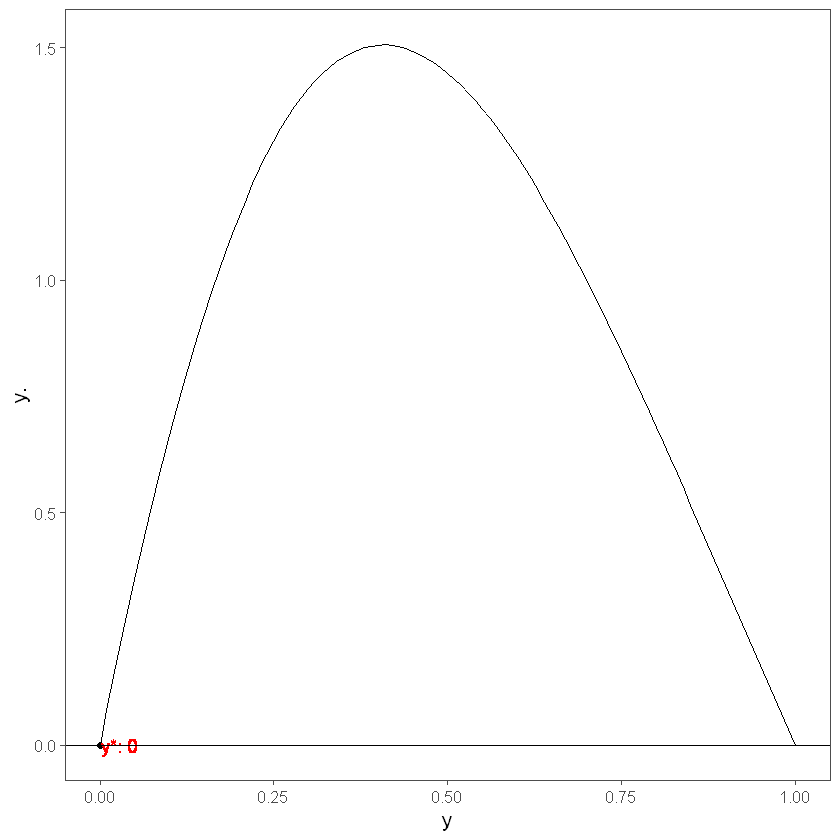

In [38]:
plot_y._y(45)

# 3策略 试试看


In [3]:
duplicate_dynamic_xy<-function(y,x,M,beta1,beta2,d,N,c,l){
  
  #-----参数解释说明------#
  # #N个个体
  # N<-4
  # #M资源 c(5,15,25)
  # M<-5
  # #less effort的成本
  # c<-1
  # #投入效用
  # beta<-1
  # #more effort的成本
  # d<-4
  #-----------------------#
    
  #这里决定用N-1
  #需要取整
    # 这里有点没懂 换成N就不行了  # floor 返回小于输入值的最大整数值 Nd最大为98，Nc最大为99
  
  

  
  #群体体选择策略c或d的收益  = 概率*pai
  # 累加
  #等价Pc<(choose(N-1, Nc)*((1-y)^Nc)*(y^Nd))*pai_c
    Pc=0
    Pd=0
    Pl = 0 
#     pow = -1.5
    k = 1
    for (Nd in 0:(N-1)){ 
        for (Nl in 0:(N-1-Nd)){
            Nc = N-1-Nd-Nl
            pai_d = beta1*d/(beta1*(Nd+1)*d+beta2*Nc*c+Nl*l)
            pai_c = c/(beta1*Nd*d+beta2*Nc*c+Nl*l)
            pai_l = beta2*l/(beta1*Nd*d+Nc+beta2*(Nl+1)*l)
            Pd = Pd + choose(N-1,Nd)*choose(N-1-Nd,Nl)*y^Nd*(1-x-y)^Nc*x^Nl*pai_d
            Pc = Pc + choose(N-1,Nd)*choose(N-1-Nd,Nl)*y^Nd*(1-x-y)^Nc*x^Nl*pai_c
            Pl = Pl + choose(N-1,Nd)*choose(N-1-Nd,Nl)*y^Nd*(1-x-y)^Nc*x^Nl*pai_l
        }
        R_ <- y*Pd+x*Pl+(1-x-y)*Pc  ##均值
        y. <- y*(Pd-R_)
        x. <- x*(Pl-R_)
        
        return(c(y.,x.))
}
    }

# 不大好搞

In [ ]:
plot_xy._xy<-function(M){
  y.<-c()
  x.<-c()
  
  for(y in seq(0, 1, 0.01)){
    temp<-duplicate_dynamic(y,x,M,beta=1,beta2=1,d=4,N=5,c=1,l=0.5)
    
    # N: 个体数
    # M: 资源 c(5,15,25)
    # c: less effort的成本
    # beta: 投入效用
    # d: more effort的成本
    
    y.<-c(y.,temp[1])
    x.<-c(x.,temp[2])
  }
  
  df <- data.frame(x = seq(0, 1, 0.01), y = y.) %>% 
    mutate(y1=c(y.[-1],1)) %>% 
    mutate(y0=y*y1)
  
  #ystar<-df$x[df$y0<0]+0.005 #即横坐标
  
  ystar<-ifelse(sum(df$x[df$y0<0])==0,0,df$x[df$y0<0]+0.005)
  
  ggplot(df,aes(x=x,y=y))+
    geom_line(color="black",size=0.3)+
    theme_few() +
    geom_point(aes(x=ystar,y=0))+
    geom_text(aes(x=ystar,y=0),label=paste("y*:",ystar),size=4,nudge_y = 0.001,nudge_x = 0.03,color="red")+
    geom_hline(aes(yintercept = 0),size=0.3)+
    labs(x = "y", y = "y.")
    
    
}

In [11]:
plot_t <- function(M){
    steps = 500
    endings = c()
    df = data.frame()
    gp = ggplot(x = seq(1,steps+1,1))
    beta1 = 1
    beta2 = 1
    d = 4
    N = 5
    c = 1
    l = 0.5
    # 找到要跑多少步
    for (starting in seq(0.01,0.99,0.01)){
        t = seq(1,steps,1)
        y = c(starting)
        x = c((1-starting)*0.3)
        
        for (i in t){
            temp = duplicate_dynamic_xy(y[length(y)],x[length(x)],M,beta1,beta2,d,N,c,l)
            y. = temp[1]
            x. = temp[2]
            if (abs(y.) <0.0001){
                endings = c(endings,i)
                break
            }
            y = c(y,y.*0.1 + y[length(y)])
            x = c(x,x.*0.1 + x[length(x)])
        }
    }
    ending = max(endings)

    # 按最大步数再跑一遍
    for (starting in seq(0.01,0.99,0.01)){
        t = seq(1,ending,1)
        y = c(starting)
        for (i in t){
            temp = duplicate_dynamic_xy(y[length(y)],x[length(x)],M,beta1,beta2,d,N,c,l)
            y. = temp[1]
            x. = temp[2]
            y = c(y,y. * 0.1 + y[length(y)])
            x = c(x,x.*0.1 + x[length(x)])
        }
        df = rbind(df,data.frame(label=rep(as.character(starting),length(y)),t=seq(1,ending+1,1),y=y,x=x))
    }
    ggplot(df,aes(x=t,y=y,color=label))+
        geom_line()+
        geom_point()+
        theme(legend.position="none")
    ggplot(df,aes(x=t,y=x,color=label))+
    geom_line()+
    geom_point()+
    theme(legend.position="none")
}

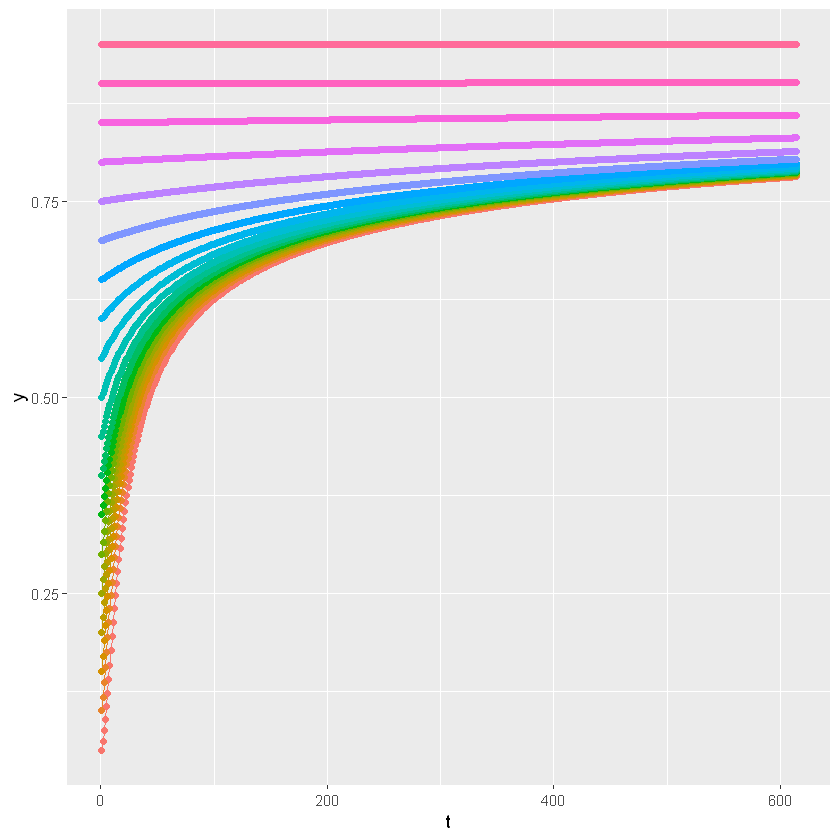

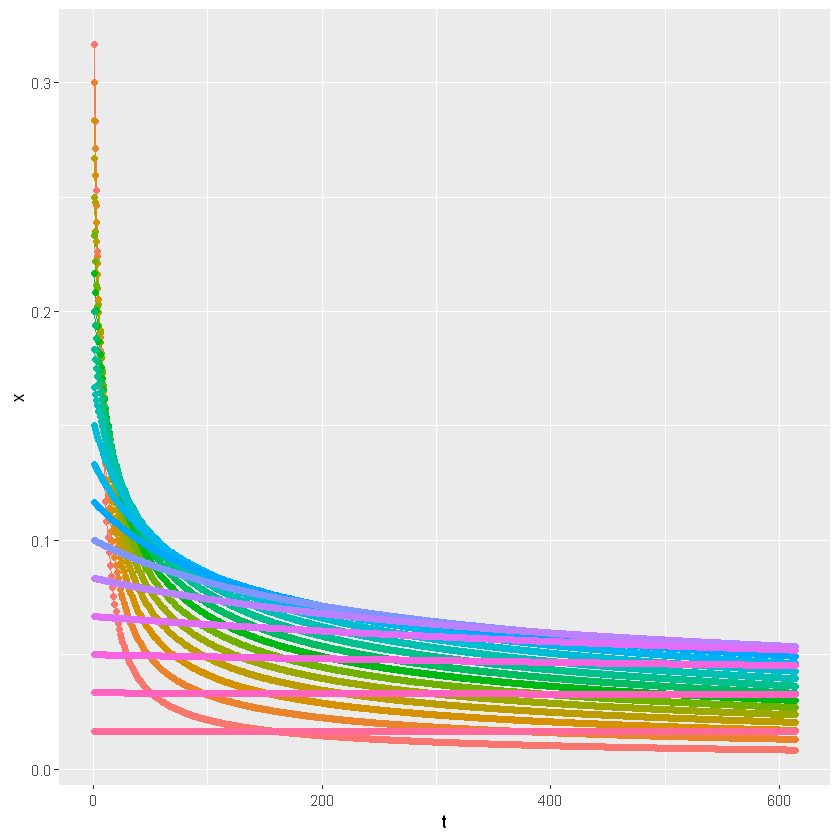

In [20]:
M =15
steps = 5000
    endings = c()
    df = data.frame()
    gp = ggplot(x = seq(1,steps+1,1))
    beta1 = 1
    beta2 = 1
    d = 4
    N = 5
    c = 1
    l = 0.5
    # 找到要跑多少步
    for (starting in seq(0.05,0.95,0.05)){
        t = seq(1,steps,1)
        y = c(starting)
        x = c((1-starting)/3)
        
        for (i in t){
            temp = duplicate_dynamic_xy(y[length(y)],x[length(x)],M,beta1,beta2,d,N,c,l)
            y. = temp[1]
            x. = temp[2]
#             cat(temp,ending="\n")
            if (abs(y.) <0.0001){
                endings = c(endings,i)
                break
            }
            y = c(y,y. + y[length(y)])
            x = c(x,x. + x[length(x)])
        }
    }
    ending = max(endings)

    # 按最大步数再跑一遍
    for (starting in seq(0.05,0.95,0.05)){
        t = seq(1,ending,1)
        y = c(starting)
        x = c((1-starting)/3)
        for (i in t){
            temp = duplicate_dynamic_xy(y[length(y)],x[length(x)],M,beta1,beta2,d,N,c,l)
            y. = temp[1]
            x. = temp[2]
            y = c(y,y.  + y[length(y)])
            x = c(x,x. + x[length(x)])
        }
#         cat(rep(as.character(starting),length(y)),end="\n")
#         cat(endings,end="\n")
#         cat(x,end="\n")
#         cat(y,end="\n")
        df = rbind(df,data.frame(label=rep(as.character(starting),length(y)),t=seq(1,ending+1,1),y=y,x=x))
    }
    ggplot(df,aes(x=t,y=y,color=label))+
        geom_line()+
        geom_point()+
        theme(legend.position="none")
    ggplot(df,aes(x=t,y=x,color=label))+
    geom_line()+
    geom_point()+
    theme(legend.position="none")

In [20]:
    endings = c()
    df = data.frame()
    gp = ggplot(x = seq(1,steps+1,1))
    beta1 = 1
    beta2 = 1
    d = 4
    N = 5
    c = 1
    l = 0.5
    # 找到要跑多少步

            temp = duplicate_dynamic_xy(0.01,0.33,M,beta1,beta2,d,N,c,l)
    temp

[1]  0.002844622 -0.037743759